In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sympy import Point,Line

In [2]:
%config IPCompleter.greedy=True
#%config NotebookApp.iopub_data_rate_limit=1.0e10

In [3]:
data = open('/home/shobhit/NewDataset/UCI HAR Dataset/train/X_train.txt')

In [4]:
lines = data.readlines()
len(lines)

7352

In [5]:
lines[1]

'  2.7841883e-001 -1.6410568e-002 -1.2352019e-001 -9.9824528e-001 -9.7530022e-001 -9.6032199e-001 -9.9880719e-001 -9.7491437e-001 -9.5768622e-001 -9.4306751e-001 -5.5785126e-001 -8.1840869e-001  8.4930787e-001  6.8584458e-001  8.2263681e-001 -9.8193011e-001 -9.9999130e-001 -9.9978838e-001 -9.9840537e-001 -9.9915036e-001 -9.7786550e-001 -9.4822478e-001 -7.1489166e-001 -5.0093000e-001 -5.7097906e-001  6.1162716e-001 -3.2954862e-001  2.8421321e-001  2.8459454e-001  1.1570542e-001 -9.0962529e-002  2.9431041e-001 -2.8121057e-001  8.5988430e-002 -2.2152694e-002 -1.6656535e-002 -2.2064350e-001 -1.3428663e-002 -7.2691890e-002  5.7938169e-001  9.6656113e-001 -1.4155127e-001  1.0937881e-001 -9.9741134e-001 -9.8944741e-001 -9.3163868e-001 -9.9788359e-001 -9.8961366e-001 -9.3324040e-001  8.9206031e-001 -1.6134256e-001  1.2258573e-001  9.8452014e-001 -1.1489334e-001  1.0276411e-001 -3.8342955e-001  9.0782890e-001 -9.7058275e-001 -9.7850045e-001 -9.9918838e-001 -9.9002851e-001 -9.4168540e-001 -1.000

In [6]:
new_lines=[]
for i,line in enumerate(lines):
    temp = line.strip('\n')
    temp = temp.strip('  ')
    temp = re.sub("\s+",",",temp.strip())
    a=[float(e) for e in temp.split(',')]
    new_lines.append(a)

In [7]:
z=np.array(new_lines)
z.shape

(7352, 561)

In [8]:
#pca = PCA(n_components=4)
#pca.fit(z)

In [9]:
#print(pca.explained_variance_ratio_)

In [10]:
#sample = pca.transform(z)
#sample[9]
scale=StandardScaler()
sample=scale.fit_transform(z)

**Elbow using Silhouette Score**

In [11]:
X=sample

For n_clusters = 2 The average silhouette_score is : 0.3965049403141253


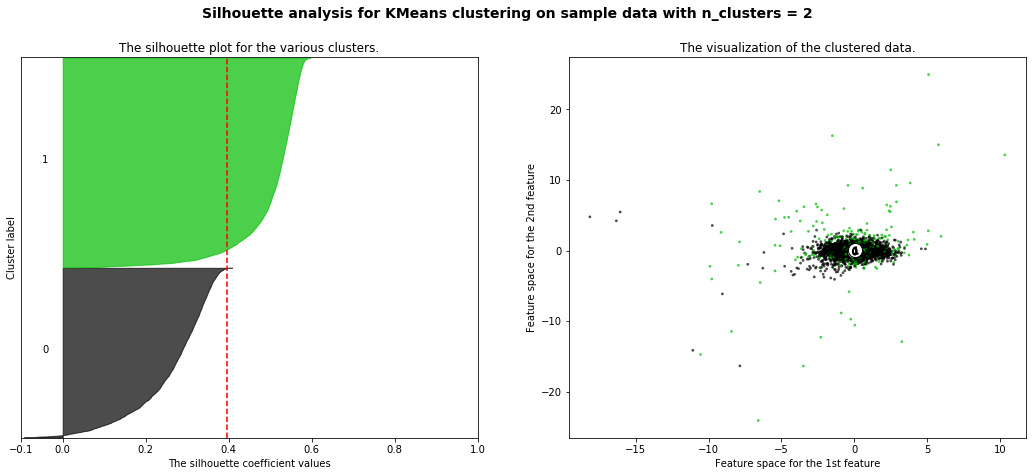

For n_clusters = 3 The average silhouette_score is : 0.3274077920801445


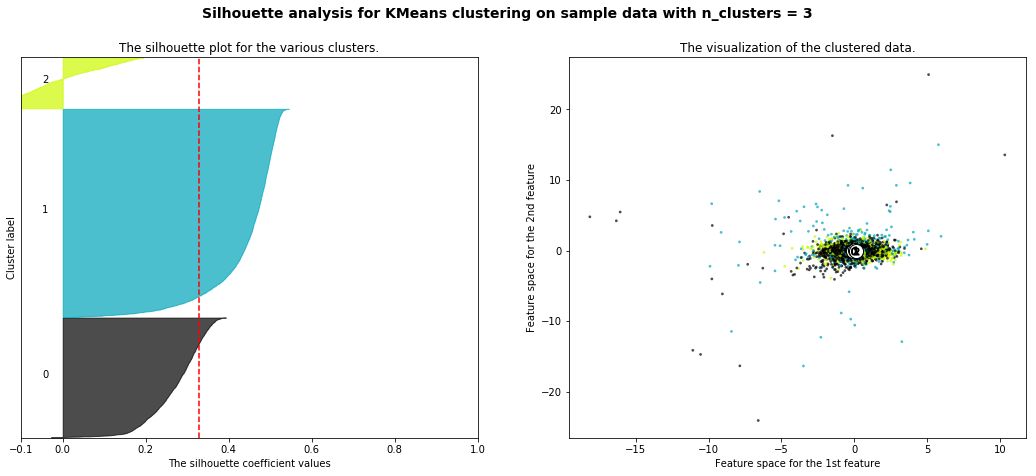

For n_clusters = 4 The average silhouette_score is : 0.1649610822021421


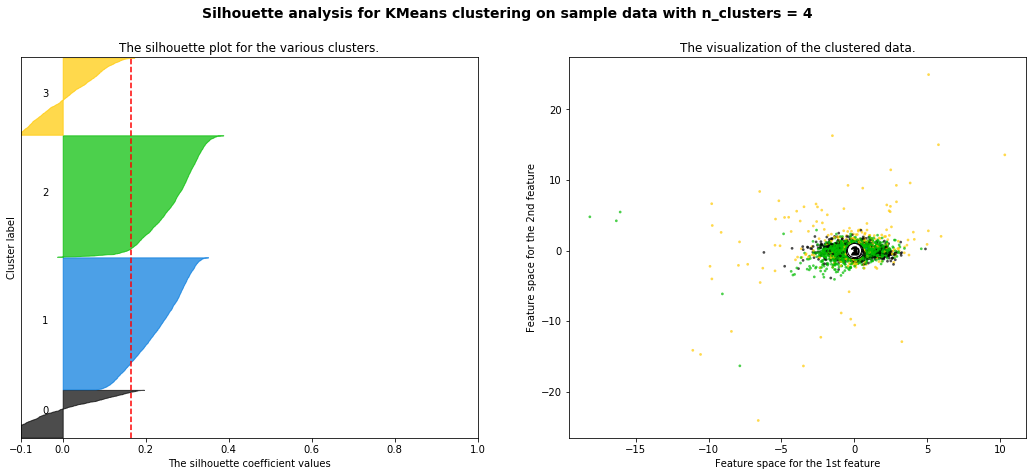

For n_clusters = 5 The average silhouette_score is : 0.13163489142092027


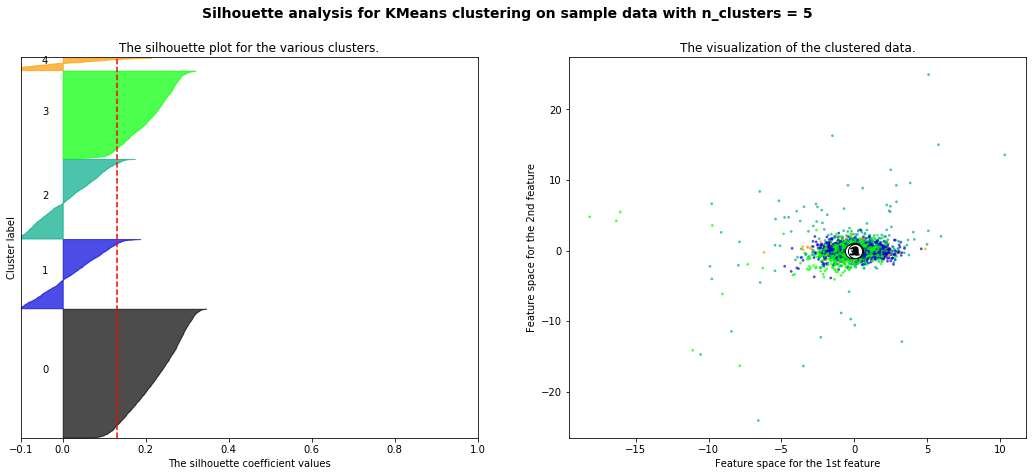

For n_clusters = 6 The average silhouette_score is : 0.10867232754352445


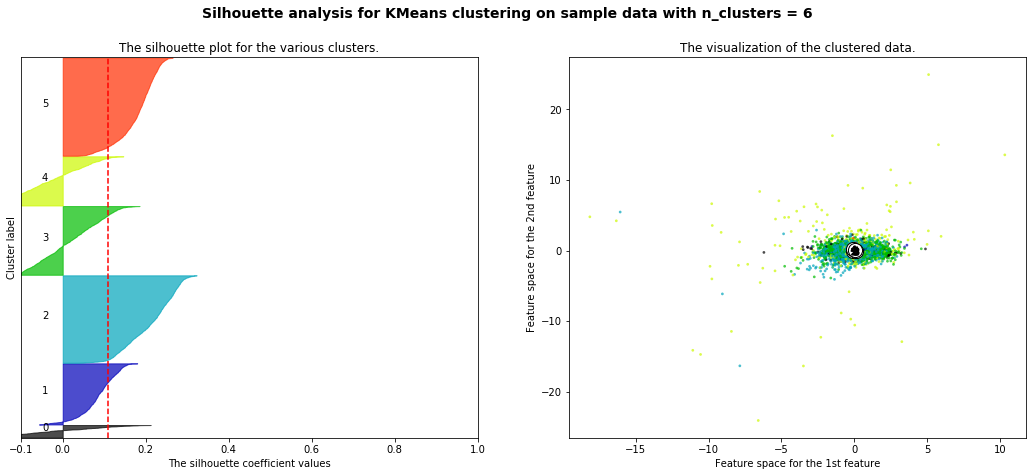

For n_clusters = 7 The average silhouette_score is : 0.10533366545325636


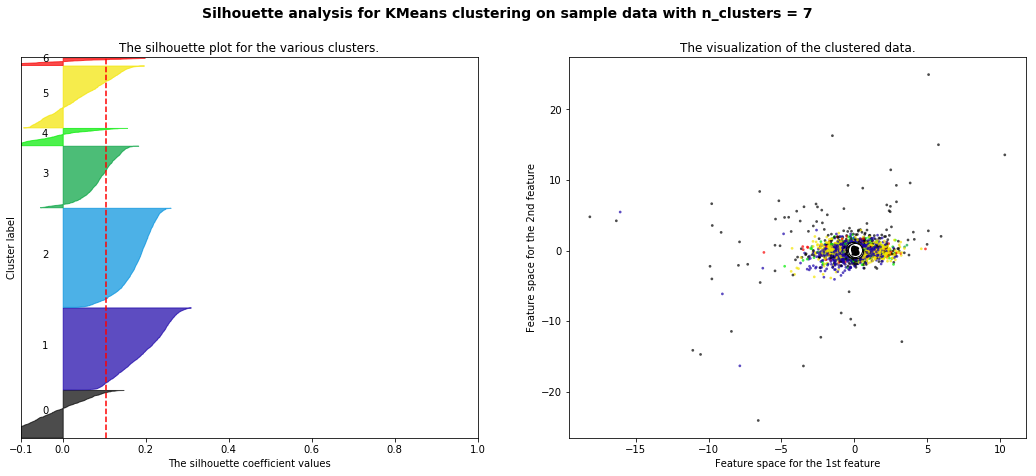

For n_clusters = 8 The average silhouette_score is : 0.08276516187166702


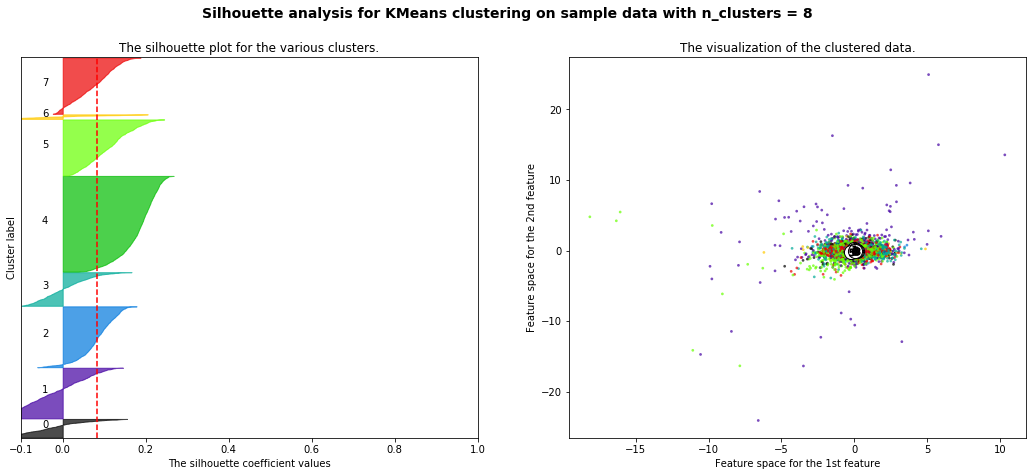

For n_clusters = 9 The average silhouette_score is : 0.07733262846195886


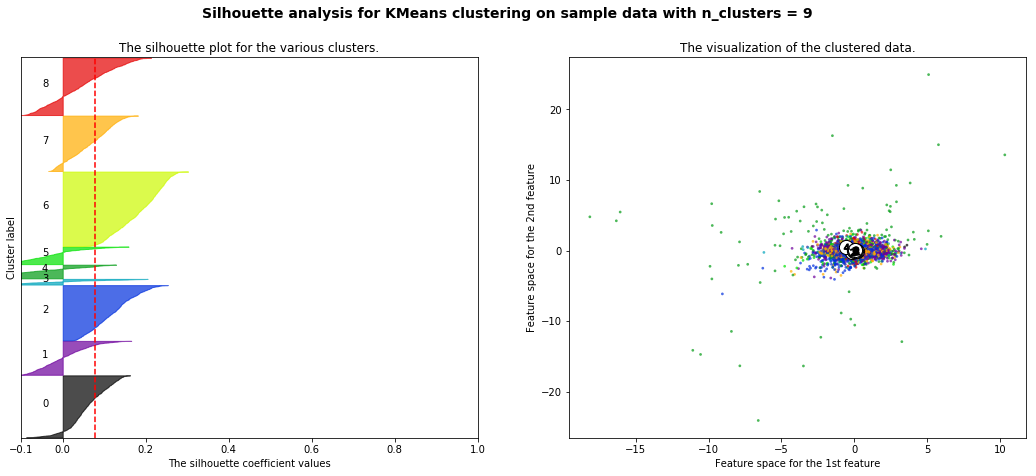

For n_clusters = 10 The average silhouette_score is : 0.08107935172986375


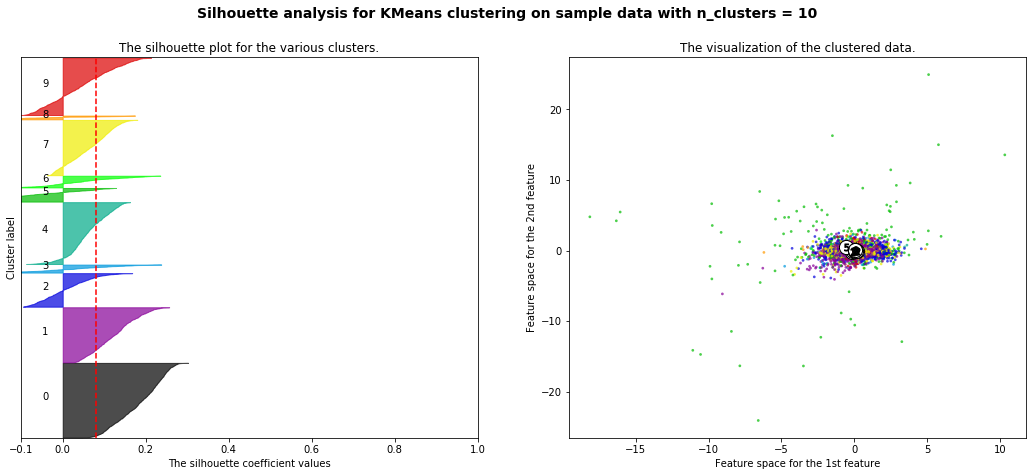

In [12]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
scores = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    scores.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    #print("For n_clusters =", n_clusters,"The sample silhouette_score is :", sample_silhouette_values)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [13]:
print(scores)

[0.3965049403141253, 0.3274077920801445, 0.1649610822021421, 0.13163489142092027, 0.10867232754352445, 0.10533366545325636, 0.08276516187166702, 0.07733262846195886, 0.08107935172986375]


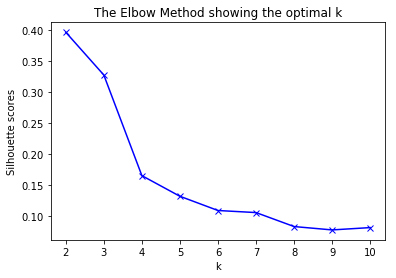

In [14]:
plt.plot(range_n_clusters,scores,'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette scores')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [15]:
slope=[]
for i in range(1,8):
    print('score 1 :'+str(scores[i])+' score 2 :'+str(scores[i-1]))
    s= (scores[i]-scores[i-1])
    slope.append([i+2,s])
slope

score 1 :0.3274077920801445 score 2 :0.3965049403141253
score 1 :0.1649610822021421 score 2 :0.3274077920801445
score 1 :0.13163489142092027 score 2 :0.1649610822021421
score 1 :0.10867232754352445 score 2 :0.13163489142092027
score 1 :0.10533366545325636 score 2 :0.10867232754352445
score 1 :0.08276516187166702 score 2 :0.10533366545325636
score 1 :0.07733262846195886 score 2 :0.08276516187166702


[[3, -0.06909714823398083],
 [4, -0.1624467098780024],
 [5, -0.033326190781221815],
 [6, -0.022962563877395828],
 [7, -0.003338662090268091],
 [8, -0.022568503581589336],
 [9, -0.00543253340970816]]

In [16]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,6):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 3
Optimal Number of Clusters = 4
Optimal Number of Clusters = 5
Optimal Number of Clusters = 7


In [17]:
distances=[]
for i in range(0,9):
    p1=Point(2,scores[0])
    p2=Point(10,scores[8])
    l1 = Line(p1,p2)
    p=Point(i+2,scores[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+2))

Optimal number 0f clusters = 4
